# Using the summary coordinates

These coordinates are provided in the `acm.observable` classes to give the shape of the lhc objects, and the keys used to apply the filters (see `acm.data.io_tools`).
## Reshaping the data

Can be useful to convert the data into a more readable format, make it easier to plot, or transform it into an `xarray` dataset.

In [8]:
from acm.data.io_tools import summary_coords
# Get a lhc_file to work with. Note that TPCF already has bult-in filters, so this is just an example.
from acm.projects.emc_new import GalaxyCorrelationFunctionMultipoles as TPCF
statistic = TPCF()
lhc_y = statistic.lhc_y

coords = summary_coords(
    statistic = statistic.stat_name,
    coord_type = 'lhc_y', # Will return the shape of the lhc_y array
    bin_values = statistic.bin_values,
    summary_coords_dict=statistic.summary_coords_dict,
)
dimensions = list(coords.keys())
lhc_y = lhc_y.reshape([len(coords[d]) for d in dimensions])

print(f"Dimensions of lhc_y: {dimensions}")
print(f"Shape of lhc_y: {lhc_y.shape}")

Dimensions of lhc_y: ['cosmo_idx', 'hod_idx', 'multipoles', 'bin_values']
Shape of lhc_y: (85, 100, 2, 50)


## Applying a filter

Let's only keep Cosmology 0, HOD 5, and the monopole of the correlation function.

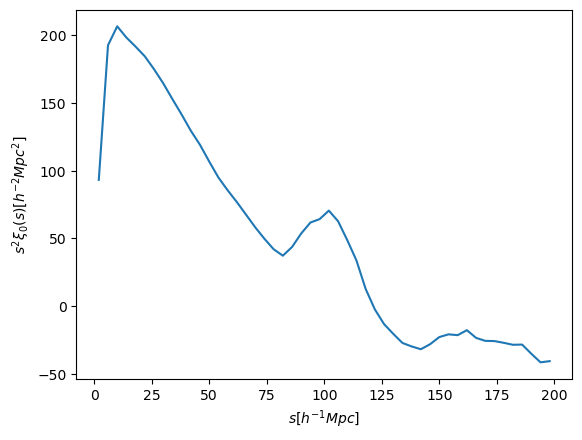

In [10]:
import matplotlib.pyplot as plt
s = statistic.bin_values # for easier reading

plt.plot(s, lhc_y[0, 5, 0]*s**2) # Plot only cosmo 0, HOD 5, monopole

plt.xlabel(r'$s [h^{-1} Mpc]$')
plt.ylabel(r'$s^2 \xi_0(s) [h^{-2} Mpc^2]$')
plt.show();

Or maybe only the first 10 bins of the correlation function.

In [19]:
lhc_y_10 = lhc_y[..., :10] # Only the first 10 bins
print(f"Shape of lhc_y_10: {lhc_y_10.shape}")

Shape of lhc_y_10: (85, 100, 2, 10)
